# 0. Introducción

<img src="https://raw.githubusercontent.com/JoePortilla/PalmerPenguins-EDA/main/img/penguins_eda_cover.webp" width="800" alt="logo" style="display:block;margin:auto;">

<img src="https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/man/figures/logo.png" width="150" alt="logo" style="display:block;margin:auto;">

El dataset `palmer penguins` es un conjunto de datos sobre pingüinos de tres especies diferentes que anidan en una colonia de Archipiélago Palmer, en la Antártida. Contiene información sobre las medidas corporales de los pingüinos, incluyendo la longitud y profundidad del pico, la longitud de la aleta y la masa corporal, así como información sobre el sexo y la edad de los pingüinos. Este conjunto de datos es ampliamente utilizado en la educación y la investigación para enseñar y ejemplificar técnicas de análisis de datos.

Hay tres especies de pingüinos en el conjunto de datos: Adelie, Gentoo, y Chinstrap. Conocidos cientificamente como Pygoscelis adeliae, Pygoscelis papua, y Pygoscelis antarctica, respectivamente. Cada especie se identifica en el dataset por su nombre común.

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="400" alt="palmerpenguins" style="display:block;margin:auto;">

El culmen es el borde superior del pico de un ave. La longitud y profundidad del culmen se renombran como variables "bill_length_mm" y "bill_depth_mm" para ser más intuitivas. En este conjunto de datos de pingüinos, la longitud y profundidad del culmen (pico) se miden como se muestra a continuación:

<img src="https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/man/figures/culmen_depth.png" width="500" alt="pico" style="display:block;margin:auto;">

El objetivo es construir un modelo que utilice las características para clasificar los pingüinos con un máximo de precisión.

Para alcanzar este objetivo, vamos a realizar un análisis exploratorio de datos para comprender los datos y elegir las mejores características. Este notebook se centra en explorar y visualizar el conjunto de datos utilizando bibliotecas como Seaborn y Matplotlib. El procesamiento de datos se realiza con Pandas.

## Paquetes utilizados:
- Procesamiento de datos: Pandas.
- Visualización de datos: Seaborn y Matplotlib.

## Referencias:
- Información adaptada de https://github.com/allisonhorst/palmerpenguins
- Artwork by @allison_horst


# 1. Ajustes Iniciales

## 1.1 Importación de Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Definición de estilo de gráficas

In [2]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-whitegrid")

# 2. Carga de Dataset y Preprocesamiento

In [3]:
df = pd.read_csv('/kaggle/input/penguins/penguins.csv')

In [4]:
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## 2.2. Preprocesamiento

### Eliminación de columnas

Se elimina la columna 'Unnamed: 0', ya que no es necesaria dentro del analisis.

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007


## 2.3. Generación de dataframe para cada especie

Estos dataframes se utilizarán en el analisis multivariado

In [7]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [8]:
filt = (df['species'] == 'Adelie')
df_adelie = df.loc[filt]

In [9]:
filt = (df['species'] == 'Gentoo')
df_gentoo = df.loc[filt]

In [10]:
filt = (df['species'] == 'Chinstrap')
df_chinstrap = df.loc[filt]

# 3. Exploración inicial del dataframe

### Dimensión del dataframe

In [11]:
df.shape

(344, 8)

### Balance del dataset

El dataset no esta balanceado, ya que todas las especies no tienen el mismo número de datos.

Entre los datos de pingüinos Adelie y Chinstrap existe una diferencia de más del doble de muestras.

In [12]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

### Comprobación de valores faltantes

El dataset no esta completo y faltan algunos datos, en su mayoría sobre el sexo de los pingüinos.

In [13]:
df.isnull().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### Estimación de la asimetría (Skewness)

In [14]:
df.drop(['species', 'island', 'sex'], axis=1).skew()

bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
year                -0.053728
dtype: float64

### Estimación de la curtosis

In [15]:
df.drop(['species', 'island', 'sex'], axis=1).kurt()

bill_length_mm      -0.876027
bill_depth_mm       -0.906866
flipper_length_mm   -0.984273
body_mass_g         -0.719222
year                -1.504937
dtype: float64

### Info. general del dataset

Se tiene tres variables categoricas: `species`, `island`, y `sex`. Las demás características son númericas.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


# 4. Análisis Univariado

## 4.1. Variables categóricas

### 4.1.1. Proporción

- Los pingüinos Adelie son los que más se presentan en el conjunto de datos, seguidos de la especie Gentoo y Chinstrap.
- Los pingüinos de la muestra estan balanceados en cuanto al sexo, hay exactamente 50% datos másculinos y 50% femeninos. 
- La mitad de los pingüinos se encuentra en la isla Biscoe, una minoria esta en la isla Torgersen, y los demás en la isla Dream.

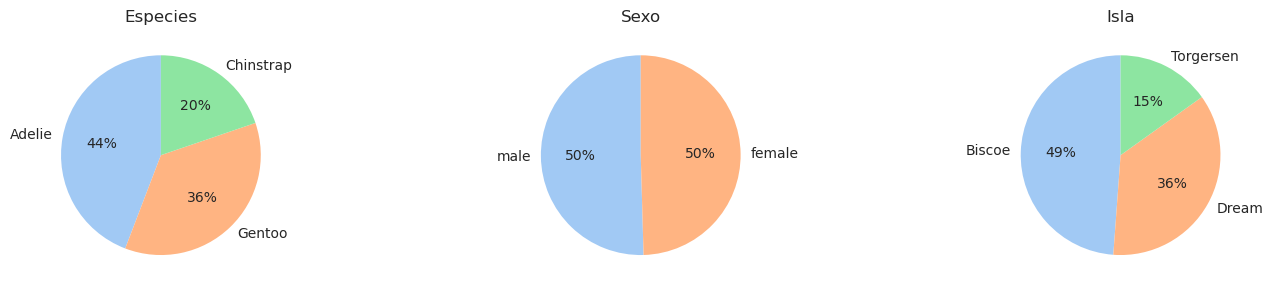

In [17]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(15, 3))

ax0 = plt.subplot2grid((1, 3),(0,0))
count = df['species'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Especies')

ax1 = plt.subplot2grid((1, 3), (0, 1))
count = df['sex'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Sexo')

ax2 = plt.subplot2grid((1, 3), (0, 2))
count = df['island'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Isla')

plt.tight_layout()

### 4.1.2. Tendencias por año

- A lo largo de los años de muestreo, la cantidad de cada especie se ha mantenido relativamente estable con pequeños incrementos y decrementos.
- La proporción de machos y hembras también se ha mantenido estable, con un pequeño incremento en cada sexo cada año.
- Inicialmente las islas Biscoe y Dream tenian cantidades similares de pingüinos, sin embargo, en 2008 la isla Biscoe tiene un incremento considerable, mientras que en Dream la población disminuye. 

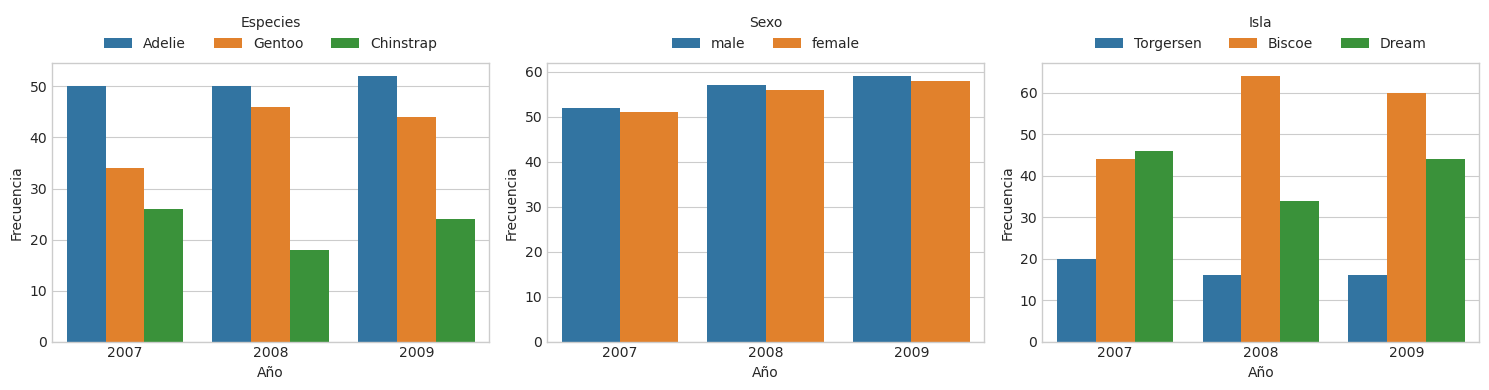

In [18]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

sns.countplot(data=df, x='year', hue='species', ax=ax[0])
ax[0].set_ylabel('Frecuencia')
ax[0].set_xlabel('Año')
sns.move_legend(ax[0], "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Especies', frameon=False)

sns.countplot(data=df, x='year', hue='sex', ax=ax[1])
ax[1].set_ylabel('Frecuencia')
ax[1].set_xlabel('Año')
sns.move_legend(ax[1], "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Sexo', frameon=False)

sns.countplot(data=df, x='year', hue='island', ax=ax[2])
ax[2].set_ylabel('Frecuencia')
ax[2].set_xlabel('Año')
sns.move_legend(ax[2], "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Isla', frameon=False)

plt.tight_layout()

## 4.2. Variables númericas

In [19]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### 4.2.1. Longitud del Pico [mm]

La mediana de la longitud del pico es de 44 mm. La mayor frecuencia se presenta en 40 mm y 45 mm, lo que genera una distribución multimodal.

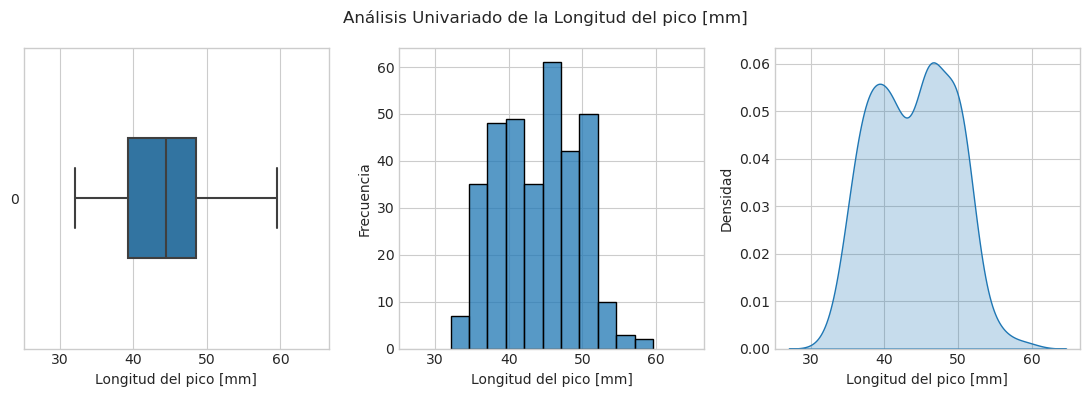

In [20]:
var = 'bill_length_mm'
var_title = 'Longitud del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### 4.2.2. Profundidad del Pico [mm]

La profundidad de pico es generalmente de 17 mm, con una alata frecuencia entre 18 y 19 mm. Su distribución se aproxima a una distribución normal con una ligera asimetria negativa.

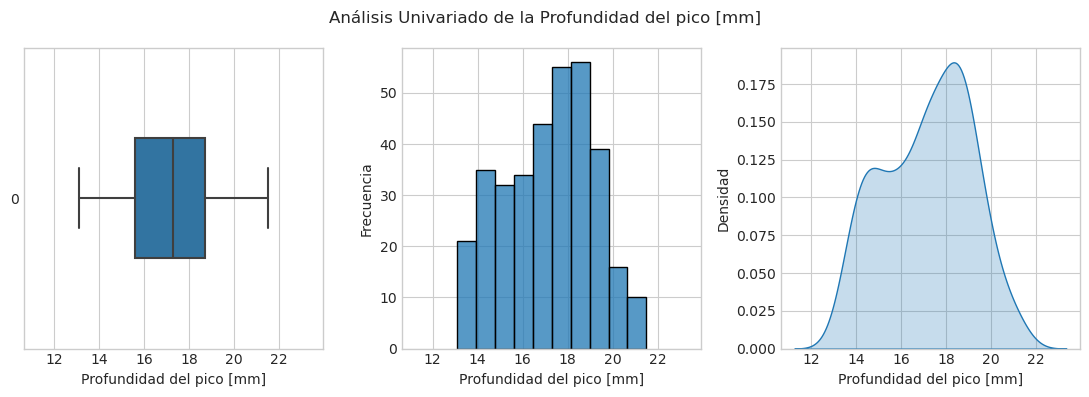

In [21]:
var = 'bill_depth_mm'
var_title = 'Profundidad del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### 4.2.3. Longitud de la aleta [mm]

La longitud de la aleta tiene una mediana de 197 mm. Cuenta un pico de frecuencia en 200mm y otro en 210 mm, separados por una zona de baja densidad de probabilidad, lo que genera una distribución multimodal.

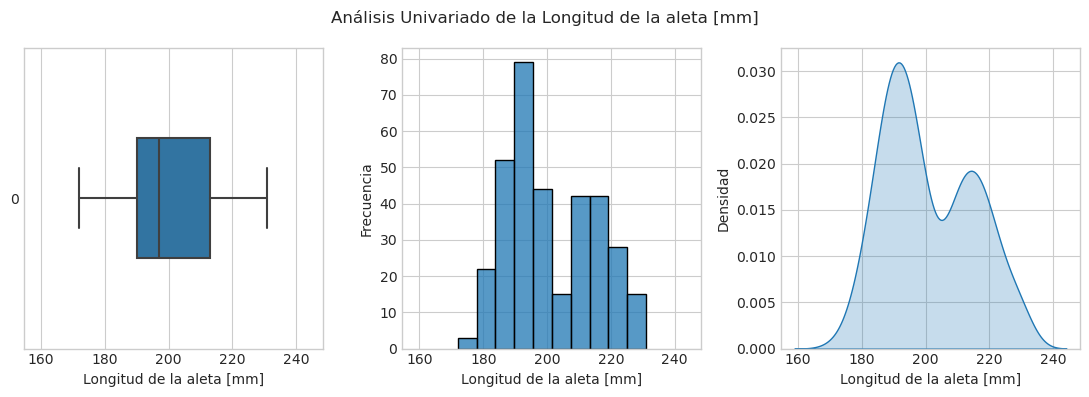

In [22]:
var = 'flipper_length_mm'
var_title = 'Longitud de la aleta [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### 4.2.4. Masa corporal [g]

Los pingüinos tienen una masa corporal generalmente de 4000 gramos o 4 Kilogramos. Su distribución tiene una frecuencia alta alrededor de esta media. Cuenta con una asimetría positiva, por lo que hay una mayor concentración de valores en la cola de la distribución en la dirección negativa.

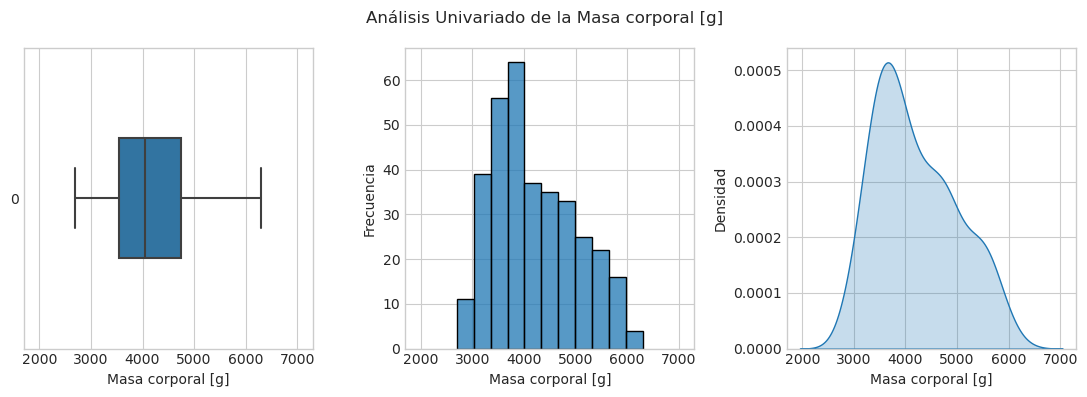

In [23]:
var = 'body_mass_g'
var_title = 'Masa corporal [g]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### 4.2.5. Tendencias por año

In [24]:
df_m = df.groupby('year').mean().reset_index()
df_m

,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,2007,43.740367,17.427523,196.880734,4124.541284
1,2008,43.541228,16.914035,202.798246,4266.666667
2,2009,44.452941,17.125210,202.806723,4210.294118


Todas las caractisticas fisicas de los pingüinos se mantuvieron estables a lo largo de los años.

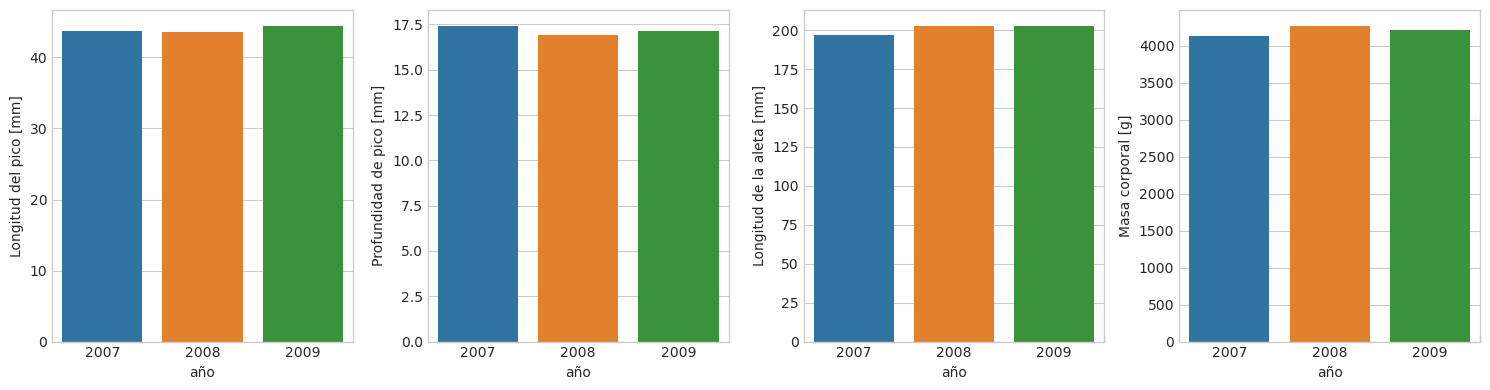

In [25]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4), sharex=True)

sns.barplot(data=df_m, x='year', y='bill_length_mm', ax=ax[0])
ax[0].set_xlabel('año')
ax[0].set_ylabel('Longitud del pico [mm]')

sns.barplot(data=df_m, x='year', y='bill_depth_mm', ax=ax[1])
ax[1].set_xlabel('año')
ax[1].set_ylabel('Profundidad de pico [mm]')

sns.barplot(data=df_m, x='year', y='flipper_length_mm', ax=ax[2])
ax[2].set_xlabel('año')
ax[2].set_ylabel('Longitud de la aleta [mm]')

sns.barplot(data=df_m, x='year', y='body_mass_g', ax=ax[3])
ax[3].set_xlabel('año')
ax[3].set_ylabel('Masa corporal [g]')

plt.tight_layout()

# 5. Análisis Multivariado

## 5.1. Longitud del Pico [mm] vs Especies

- La longitud del pico de la especie adelie es generalmente menor que la de las otras dos especies.
- La diferencia es menos clara entre Gentoo y Chinstrap, y su distribución esta superpuesta por lo que son bastante similares en su longitud de pico.

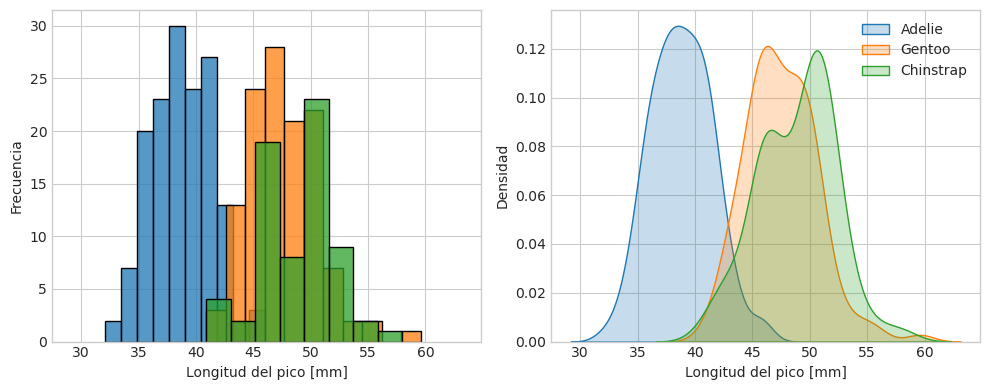

In [26]:
var = 'bill_length_mm'
var_title = 'Longitud del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_adelie, x=var, label="Adelie", kde=False, ax=ax[0])
sns.histplot(data=df_gentoo, x=var, label="Gentoo", kde=False, ax=ax[0])
sns.histplot(data=df_chinstrap, x=var, label="Chinstrap", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_adelie, x=var, label="Adelie", fill=True, ax=ax[1])
sns.kdeplot(data=df_gentoo, x=var, label="Gentoo", fill=True, ax=ax[1])
sns.kdeplot(data=df_chinstrap, x=var, label="Chinstrap", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

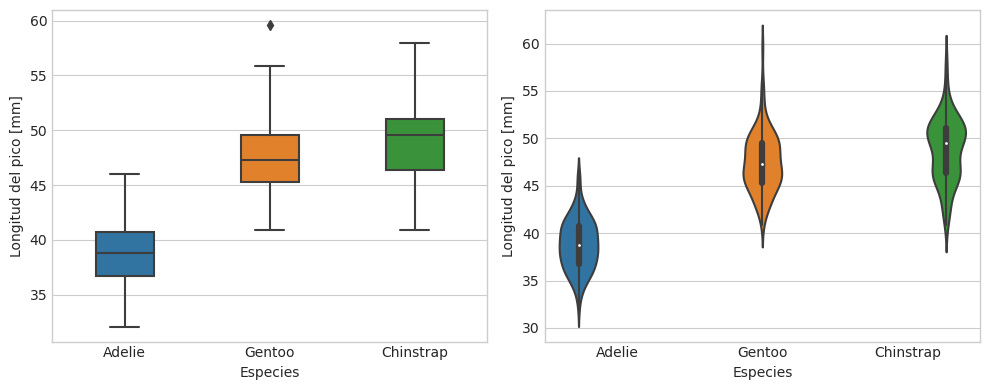

In [27]:
var = 'bill_length_mm'
var_title = 'Longitud del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[0], width=.4)
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='species', y=var, ax=ax[1], hue='species')
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)
ax[1].get_legend().remove()



plt.tight_layout()

## 5.2. Profundidad del Pico [mm] vs Especies

- La profundidad del pico de los pingüinos Gentoo es claramente menor que las otras especies.
- La especie Adelie y Chinstrap cuentan con una profundidad de pico muy similar, como se demuestra en las distribuciones superpuestas en todos los valores.

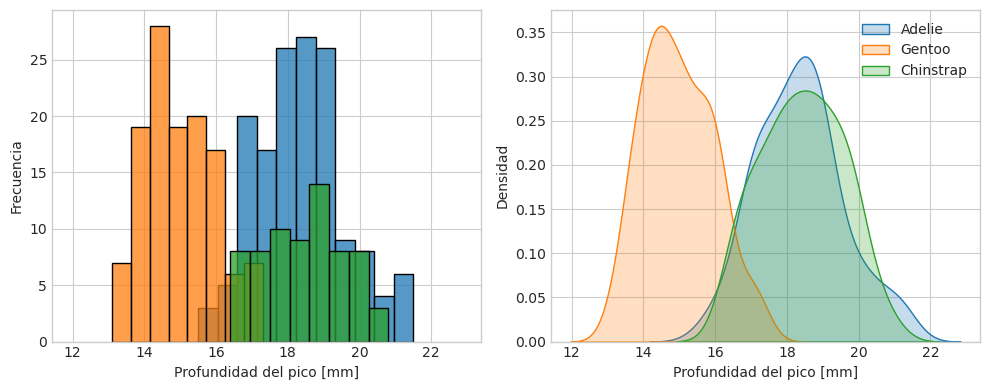

In [28]:
var = 'bill_depth_mm'
var_title = 'Profundidad del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_adelie, x=var, label="Adelie", kde=False, ax=ax[0])
sns.histplot(data=df_gentoo, x=var, label="Gentoo", kde=False, ax=ax[0])
sns.histplot(data=df_chinstrap, x=var, label="Chinstrap", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_adelie, x=var, label="Adelie", fill=True, ax=ax[1])
sns.kdeplot(data=df_gentoo, x=var, label="Gentoo", fill=True, ax=ax[1])
sns.kdeplot(data=df_chinstrap, x=var, label="Chinstrap", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

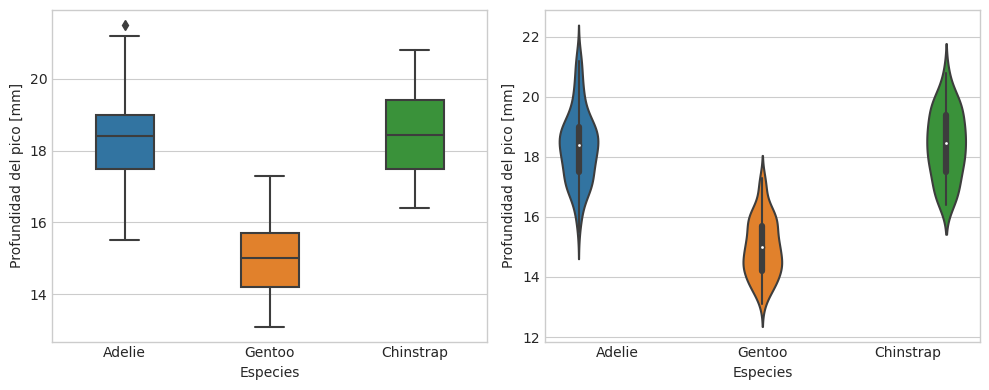

In [29]:
var = 'bill_depth_mm'
var_title = 'Profundidad del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[0], width=.4)
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='species', y=var, ax=ax[1], hue='species')
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)
ax[1].get_legend().remove()



plt.tight_layout()

## 5.3. Longitud de la aleta [mm] vs Especies

- Los pinüinos Gentoo cuentan con una aleta más grande que las demás especies.
- La longitud de la aleta de Chinstrap ser mayor que la especie Adelie, pero en muchas muestras esta diferencia de tamaño no es cierta.

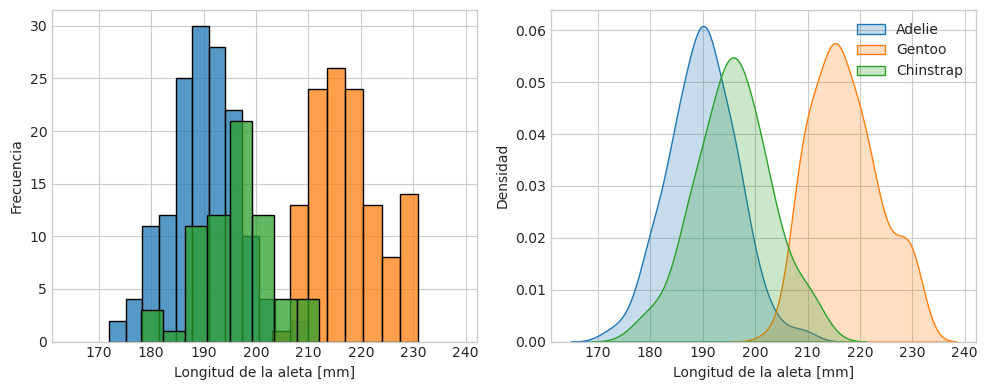

In [30]:
var = 'flipper_length_mm'
var_title = 'Longitud de la aleta [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_adelie, x=var, label="Adelie", kde=False, ax=ax[0])
sns.histplot(data=df_gentoo, x=var, label="Gentoo", kde=False, ax=ax[0])
sns.histplot(data=df_chinstrap, x=var, label="Chinstrap", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_adelie, x=var, label="Adelie", fill=True, ax=ax[1])
sns.kdeplot(data=df_gentoo, x=var, label="Gentoo", fill=True, ax=ax[1])
sns.kdeplot(data=df_chinstrap, x=var, label="Chinstrap", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

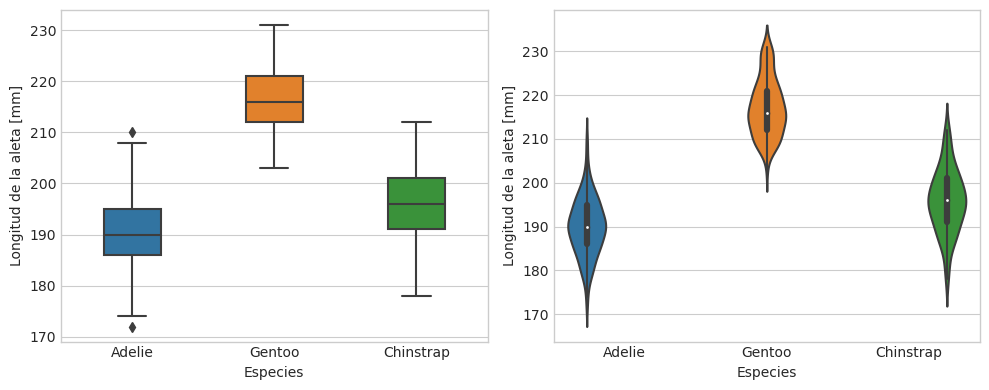

In [31]:
var = 'flipper_length_mm'
var_title = 'Longitud de la aleta [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[0], width=.4)
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='species', y=var, ax=ax[1], hue='species')
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)
ax[1].get_legend().remove()



plt.tight_layout()

## 5.4. Masa corporal [g] vs Especies

- La especie Gentoo tiene una masa corporal mayor, con una frecuencia alta de 5 Kg.
- Tanto los pingüinos Adelie, como Chinstrap, cuentan con una masa inferior que generalmente esta en 3 y 4 Kg.

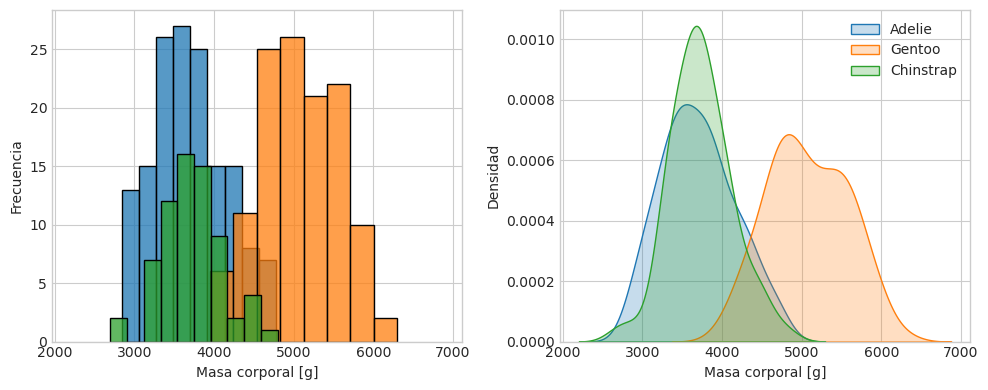

In [32]:
var = 'body_mass_g'
var_title = 'Masa corporal [g]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_adelie, x=var, label="Adelie", kde=False, ax=ax[0])
sns.histplot(data=df_gentoo, x=var, label="Gentoo", kde=False, ax=ax[0])
sns.histplot(data=df_chinstrap, x=var, label="Chinstrap", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_adelie, x=var, label="Adelie", fill=True, ax=ax[1])
sns.kdeplot(data=df_gentoo, x=var, label="Gentoo", fill=True, ax=ax[1])
sns.kdeplot(data=df_chinstrap, x=var, label="Chinstrap", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

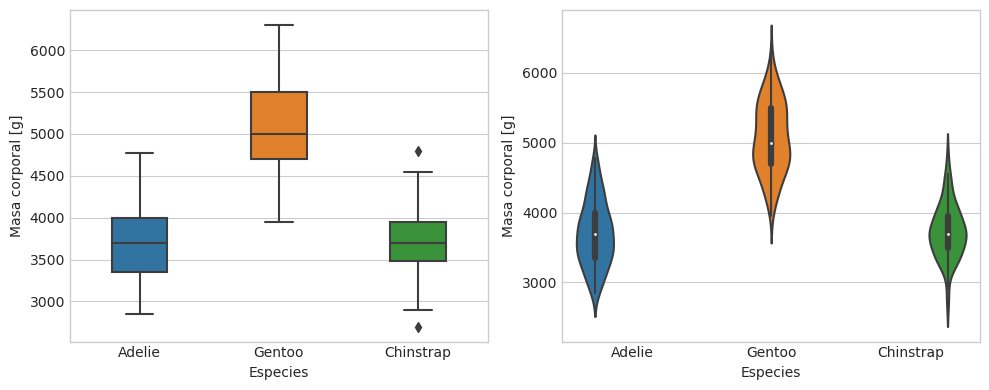

In [33]:
var = 'body_mass_g'
var_title = 'Masa corporal [g]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[0], width=.4)
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='species', y=var, ax=ax[1], hue='species')
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)
ax[1].get_legend().remove()



plt.tight_layout()

## 5.5. Longitud del Pico en relación con la Especie y el sexo vs las demás caracteristicas

Se nota que es bastante difícil separar las especies basándose únicamente en una caracteristica, en la mayoría de los casos algunas porciones de las distribuciones estan mezcladas, por lo que se pueden generar errores de clasificación.

Entonces, se procede a analizar las variables combinadas.

- La longitud de pico puede ser una caracteristica bastante util en la clasificación, dado que en la relación con las demás variables se ven grupos claramente diferenciados entre especies.
- En las graficas de longitud de la aleta y masa, de los pingüinos Adelie y Gentoo, se denota una correlación positiva. Cuando la longitud del pico aumenta, también se incrementa la longitud de la aleta y su masa corporal.

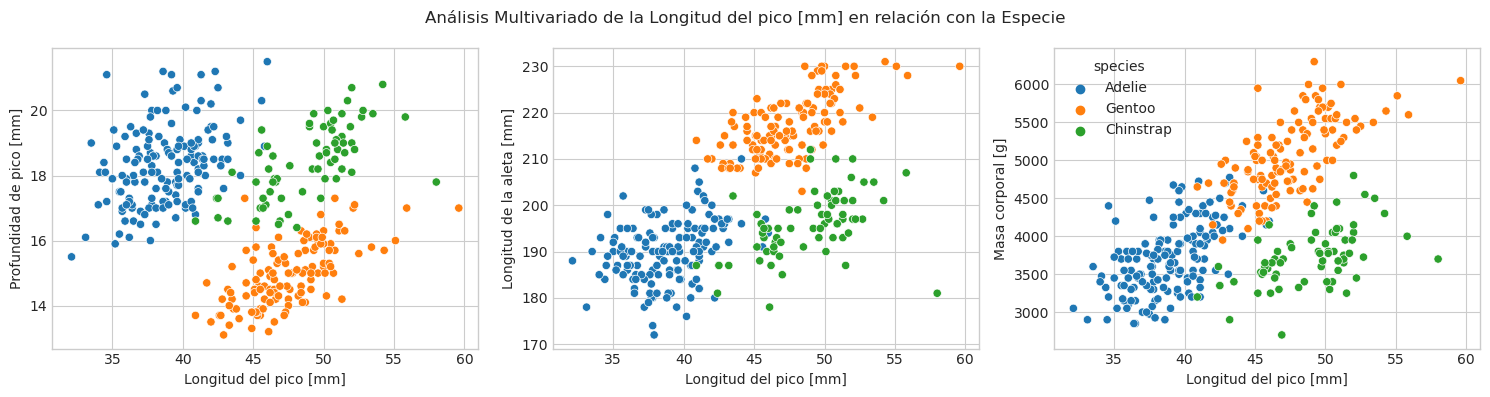

In [34]:
hue = 'species'
bl = 'bill_length_mm'; bl_ = 'Longitud del pico [mm]'
bd = 'bill_depth_mm'; bd_ = 'Profundidad de pico [mm]'
fl = 'flipper_length_mm'; fl_ = 'Longitud de la aleta [mm]'
bm = 'body_mass_g'; bm_ = 'Masa corporal [g]'

var = bl; var_ = bl_
var1 = bd; var1_ = bd_
var2 = fl; var2_ = fl_
var3 = bm; var3_ = bm_

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

sns.scatterplot(data=df, x=var, y=var1, ax=ax[0], hue=hue)
ax[0].set_xlabel(var_)
ax[0].set_ylabel(var1_)
ax[0].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var2, ax=ax[1], hue=hue)
ax[1].set_xlabel(var_)
ax[1].set_ylabel(var2_)
ax[1].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var3, ax=ax[2], hue=hue)
ax[2].set_xlabel(var_)
ax[2].set_ylabel(var3_)

fig.suptitle(f'Análisis Multivariado de la {var_} en relación con la Especie')

plt.tight_layout()

- En cuanto al sexo no se puede visualizar una agrupación definida.
- Tanto machos como hembras tienen valores de caracteristicas fisicas dispersos.

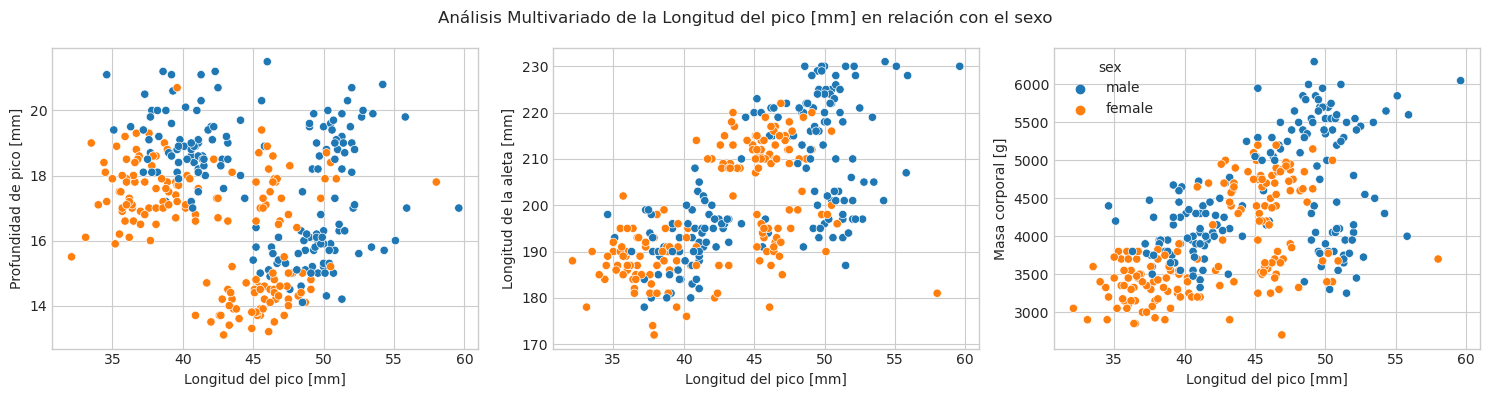

In [35]:
hue = 'sex'
bl = 'bill_length_mm'; bl_ = 'Longitud del pico [mm]'
bd = 'bill_depth_mm'; bd_ = 'Profundidad de pico [mm]'
fl = 'flipper_length_mm'; fl_ = 'Longitud de la aleta [mm]'
bm = 'body_mass_g'; bm_ = 'Masa corporal [g]'

var = bl; var_ = bl_
var1 = bd; var1_ = bd_
var2 = fl; var2_ = fl_
var3 = bm; var3_ = bm_

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

sns.scatterplot(data=df, x=var, y=var1, ax=ax[0], hue=hue)
ax[0].set_xlabel(var_)
ax[0].set_ylabel(var1_)
ax[0].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var2, ax=ax[1], hue=hue)
ax[1].set_xlabel(var_)
ax[1].set_ylabel(var2_)
ax[1].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var3, ax=ax[2], hue=hue)
ax[2].set_xlabel(var_)
ax[2].set_ylabel(var3_)

fig.suptitle(f'Análisis Multivariado de la {var_} en relación con el sexo')

plt.tight_layout()

## 5.6. Profundidad del Pico en relación con la Especie y el sexo vs las demás caracteristicas

- Como se observo anteriormente, la relación entre la profundidad y longitud de pico tiene unos grupos bien definidos de acuerdo a la especie.
- Es visible que los pingüinos Gentoo tienen una masa corporal superior y una profundidad de pico inferior a las demás.
- En la figura central y derecha, las especies Adelie y Chinstrap estan mezcladas, y no se podrían separar.

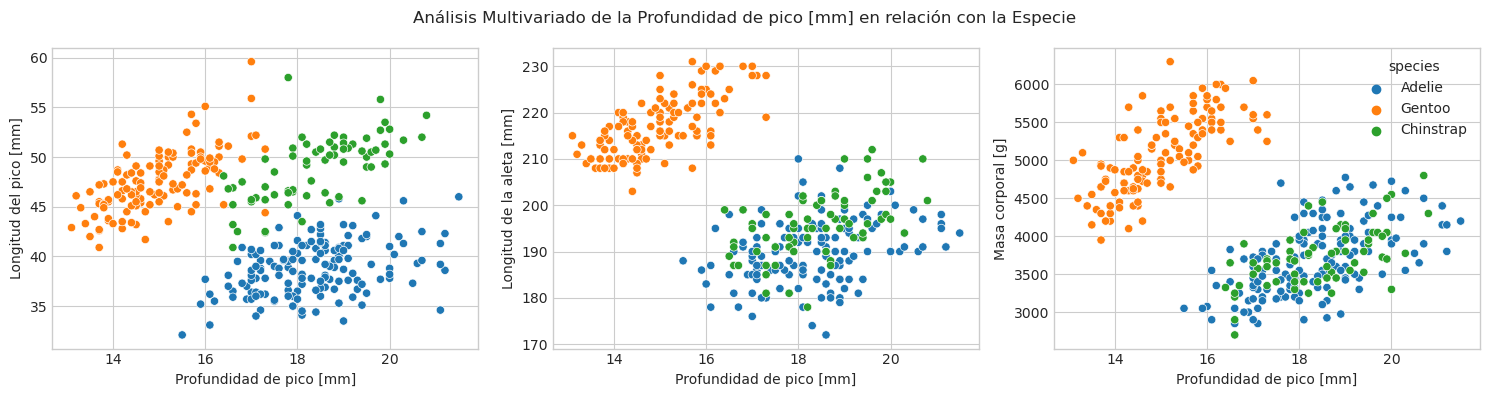

In [36]:
hue = 'species'
bl = 'bill_length_mm'; bl_ = 'Longitud del pico [mm]'
bd = 'bill_depth_mm'; bd_ = 'Profundidad de pico [mm]'
fl = 'flipper_length_mm'; fl_ = 'Longitud de la aleta [mm]'
bm = 'body_mass_g'; bm_ = 'Masa corporal [g]'

var1 = bl; var1_ = bl_
var = bd; var_ = bd_
var2 = fl; var2_ = fl_
var3 = bm; var3_ = bm_

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

sns.scatterplot(data=df, x=var, y=var1, ax=ax[0], hue=hue)
ax[0].set_xlabel(var_)
ax[0].set_ylabel(var1_)
ax[0].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var2, ax=ax[1], hue=hue)
ax[1].set_xlabel(var_)
ax[1].set_ylabel(var2_)
ax[1].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var3, ax=ax[2], hue=hue)
ax[2].set_xlabel(var_)
ax[2].set_ylabel(var3_)

fig.suptitle(f'Análisis Multivariado de la {var_} en relación con la Especie')

plt.tight_layout()

- Si bien bastantes datos se encuentran superpuestos en varias graficas, se puede observar que los datos correspodientes a las hembras tienden a ubicarse en zonas con valores inferiores.    

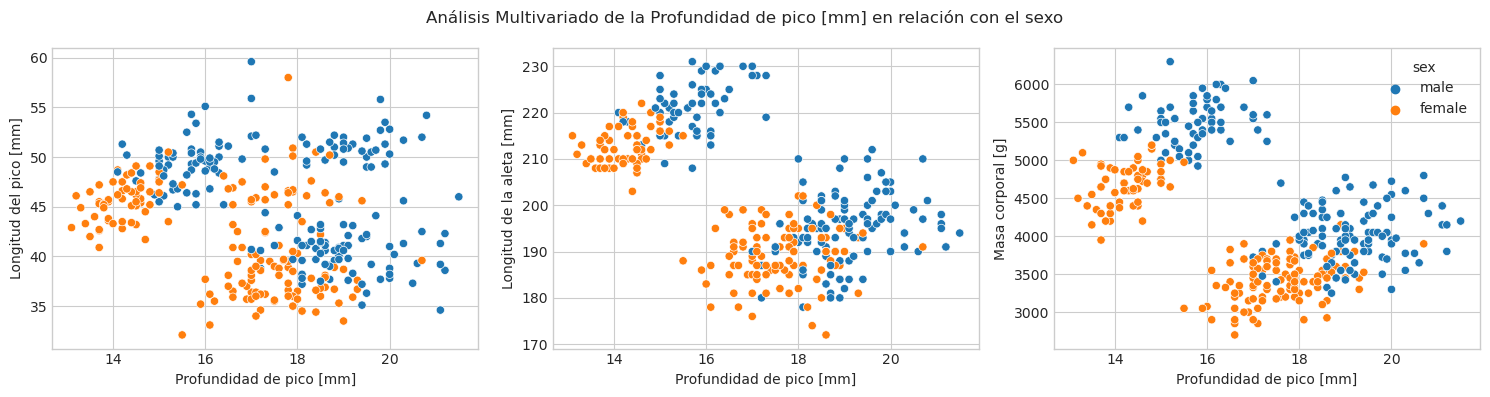

In [37]:
hue = 'sex'
bl = 'bill_length_mm'; bl_ = 'Longitud del pico [mm]'
bd = 'bill_depth_mm'; bd_ = 'Profundidad de pico [mm]'
fl = 'flipper_length_mm'; fl_ = 'Longitud de la aleta [mm]'
bm = 'body_mass_g'; bm_ = 'Masa corporal [g]'

var1 = bl; var1_ = bl_
var = bd; var_ = bd_
var2 = fl; var2_ = fl_
var3 = bm; var3_ = bm_

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

sns.scatterplot(data=df, x=var, y=var1, ax=ax[0], hue=hue)
ax[0].set_xlabel(var_)
ax[0].set_ylabel(var1_)
ax[0].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var2, ax=ax[1], hue=hue)
ax[1].set_xlabel(var_)
ax[1].set_ylabel(var2_)
ax[1].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var3, ax=ax[2], hue=hue)
ax[2].set_xlabel(var_)
ax[2].set_ylabel(var3_)

fig.suptitle(f'Análisis Multivariado de la {var_} en relación con el sexo')

plt.tight_layout()

## 5.7. Longitud de la aleta en relación con la Especie y el sexo vs las demás caracteristicas

- Se dan las mismas observaciones que el punto 5.6

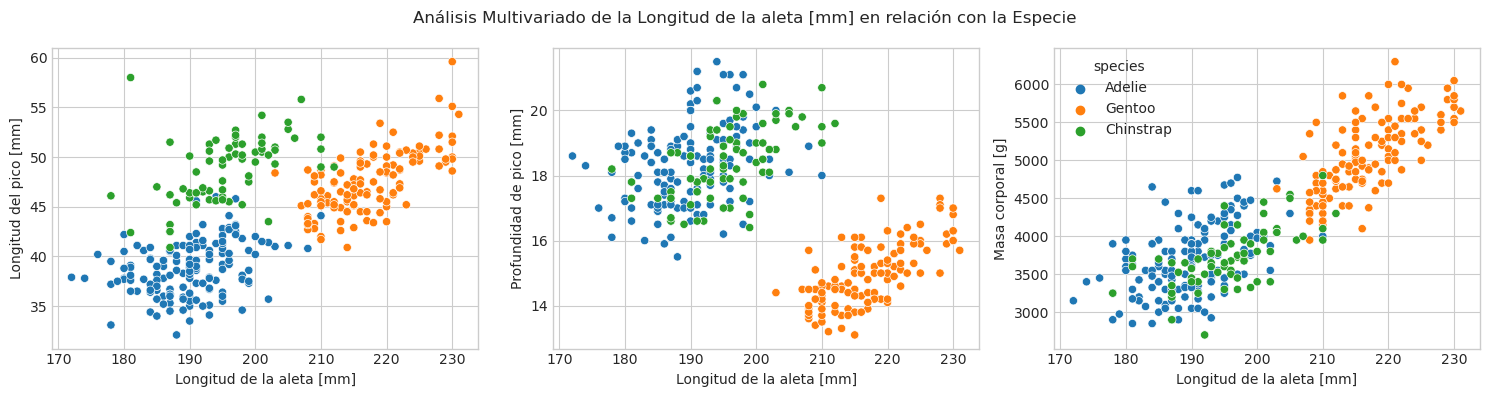

In [38]:
hue = 'species'
bl = 'bill_length_mm'; bl_ = 'Longitud del pico [mm]'
bd = 'bill_depth_mm'; bd_ = 'Profundidad de pico [mm]'
fl = 'flipper_length_mm'; fl_ = 'Longitud de la aleta [mm]'
bm = 'body_mass_g'; bm_ = 'Masa corporal [g]'

var1 = bl; var1_ = bl_
var2 = bd; var2_ = bd_
var = fl; var_ = fl_
var3 = bm; var3_ = bm_

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

sns.scatterplot(data=df, x=var, y=var1, ax=ax[0], hue=hue)
ax[0].set_xlabel(var_)
ax[0].set_ylabel(var1_)
ax[0].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var2, ax=ax[1], hue=hue)
ax[1].set_xlabel(var_)
ax[1].set_ylabel(var2_)
ax[1].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var3, ax=ax[2], hue=hue)
ax[2].set_xlabel(var_)
ax[2].set_ylabel(var3_)

fig.suptitle(f'Análisis Multivariado de la {var_} en relación con la Especie')

plt.tight_layout()

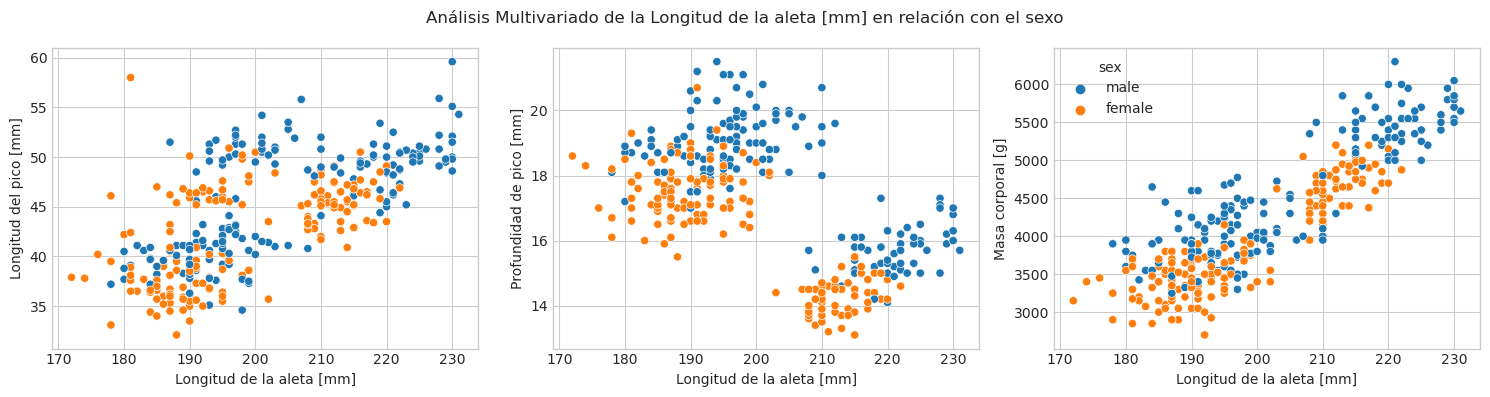

In [39]:
hue = 'sex'
bl = 'bill_length_mm'; bl_ = 'Longitud del pico [mm]'
bd = 'bill_depth_mm'; bd_ = 'Profundidad de pico [mm]'
fl = 'flipper_length_mm'; fl_ = 'Longitud de la aleta [mm]'
bm = 'body_mass_g'; bm_ = 'Masa corporal [g]'

var1 = bl; var1_ = bl_
var2 = bd; var2_ = bd_
var = fl; var_ = fl_
var3 = bm; var3_ = bm_

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

sns.scatterplot(data=df, x=var, y=var1, ax=ax[0], hue=hue)
ax[0].set_xlabel(var_)
ax[0].set_ylabel(var1_)
ax[0].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var2, ax=ax[1], hue=hue)
ax[1].set_xlabel(var_)
ax[1].set_ylabel(var2_)
ax[1].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var3, ax=ax[2], hue=hue)
ax[2].set_xlabel(var_)
ax[2].set_ylabel(var3_)

fig.suptitle(f'Análisis Multivariado de la {var_} en relación con el sexo')

plt.tight_layout()

## 5.8. Masa corporal en relación con la Especie y el sexo vs las demás caracteristicas

- Se dan las mismas observaciones que el punto 5.5

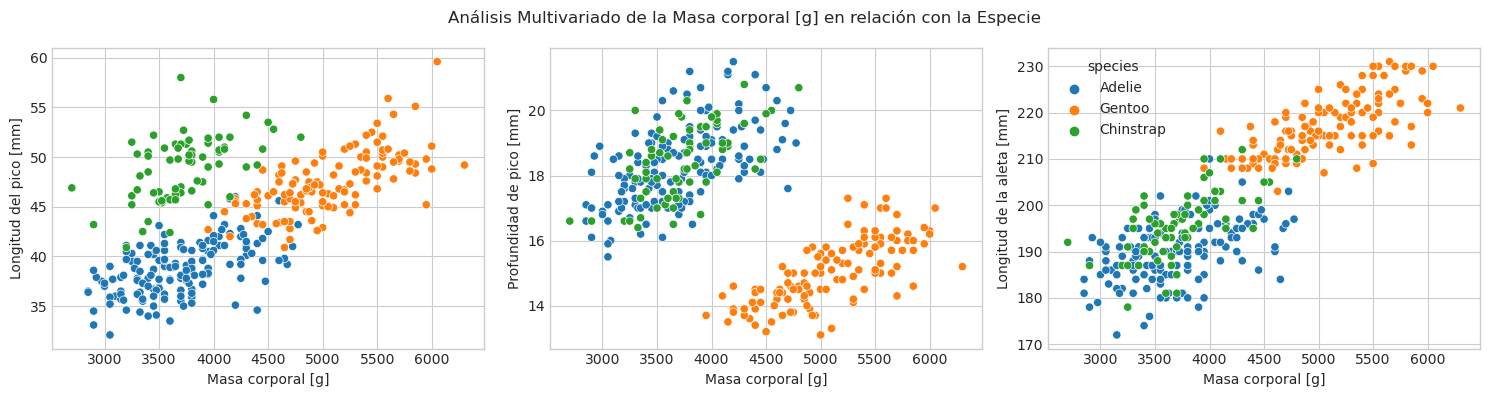

In [40]:
hue = 'species'
bl = 'bill_length_mm'; bl_ = 'Longitud del pico [mm]'
bd = 'bill_depth_mm'; bd_ = 'Profundidad de pico [mm]'
fl = 'flipper_length_mm'; fl_ = 'Longitud de la aleta [mm]'
bm = 'body_mass_g'; bm_ = 'Masa corporal [g]'

var1 = bl; var1_ = bl_
var2 = bd; var2_ = bd_
var3 = fl; var3_ = fl_
var = bm; var_ = bm_

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

sns.scatterplot(data=df, x=var, y=var1, ax=ax[0], hue=hue)
ax[0].set_xlabel(var_)
ax[0].set_ylabel(var1_)
ax[0].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var2, ax=ax[1], hue=hue)
ax[1].set_xlabel(var_)
ax[1].set_ylabel(var2_)
ax[1].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var3, ax=ax[2], hue=hue)
ax[2].set_xlabel(var_)
ax[2].set_ylabel(var3_)

fig.suptitle(f'Análisis Multivariado de la {var_} en relación con la Especie')

plt.tight_layout()

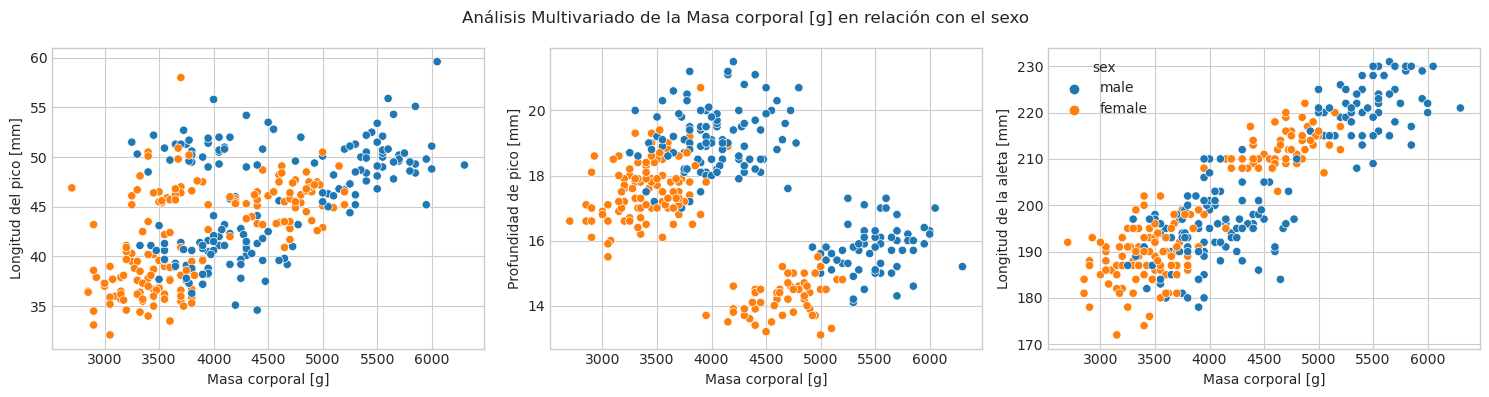

In [41]:
hue = 'sex'
bl = 'bill_length_mm'; bl_ = 'Longitud del pico [mm]'
bd = 'bill_depth_mm'; bd_ = 'Profundidad de pico [mm]'
fl = 'flipper_length_mm'; fl_ = 'Longitud de la aleta [mm]'
bm = 'body_mass_g'; bm_ = 'Masa corporal [g]'

var1 = bl; var1_ = bl_
var2 = bd; var2_ = bd_
var3 = fl; var3_ = fl_
var = bm; var_ = bm_

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

sns.scatterplot(data=df, x=var, y=var1, ax=ax[0], hue=hue)
ax[0].set_xlabel(var_)
ax[0].set_ylabel(var1_)
ax[0].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var2, ax=ax[1], hue=hue)
ax[1].set_xlabel(var_)
ax[1].set_ylabel(var2_)
ax[1].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var3, ax=ax[2], hue=hue)
ax[2].set_xlabel(var_)
ax[2].set_ylabel(var3_)

fig.suptitle(f'Análisis Multivariado de la {var_} en relación con el sexo')

plt.tight_layout()

## 5.9. Correlación entre variables

In [42]:
corr = df.drop('year', axis=1).corr()
corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


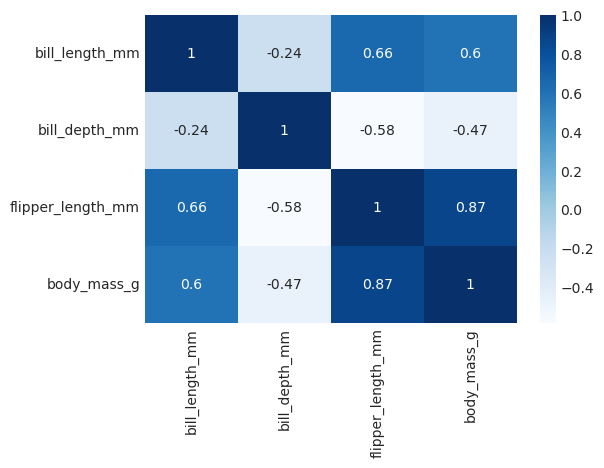

In [43]:
fig = plt.figure(figsize = (6,4))
sns.heatmap(corr, cmap='Blues', annot=True);

- Alta correlación positiva entre la longitud de la aleta y la masa corporal (0.87).
- La longitud del pico cuenta con una correlación positiva con la longitud de la aleta (0.66) y la masa corporal (0.6).
- La profundidad del pico tiene una correlación negativa con la longitud de la aleta (-0.58) y la masa corporal (-0.47).

Entonces, se observa correlaciones entre todos los atributos principales.

# 6. Conclusiones EDA

- El dataset no es balanceado en cuanto a sus especies.
- El dataset tiene datos faltantes.
- Los pingüinos Gentoo son los más faciles de distinguir:
    - Tienen una profundidad de pico menor.
    - Cuentan con una longitud de aleta y una masa corporal superior a las demás.
- Los pingüinos Adelie generalmente tienen una longitud de pico menor.
- Las especies Adelie y Chinstrap suelen tener características mezcladas y a veces son dificiles de separar.
- Todas las características fisicas estan correlacionadas entre si.